In [216]:
#Dependancies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [217]:
df_a = pd.read_csv("./Resources/tech_layoffs.csv")

df_a

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00 UTC,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00 UTC,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00 UTC,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00 UTC,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00 UTC,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2913,TutorMundi,Sao Paulo,Brazil,South America,4,2020-04-24 00:00:00 UTC,100.000000,4,0,Education,Series A,$2,2020,-23.54750,-46.63611
1414,3039,Spyce,Boston,USA,North America,4,2020-04-08 00:00:00 UTC,12.000000,33,29,Food,Series A,$26,2020,42.35843,-71.05977
1415,3261,Flytedesk,Boulder,USA,North America,4,2020-03-18 00:00:00 UTC,20.000000,20,16,Marketing,Seed,$4,2020,40.01499,-105.27055
1416,447,FrontRow,Bengaluru,India,Asia,4,2023-07-10 00:00:00 UTC,100.000000,4,0,Education,Series A,$17,2023,12.97194,77.59369


In [218]:
#Info
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #                            1418 non-null   int64  
 1   Company                      1418 non-null   object 
 2   Location_HQ                  1418 non-null   object 
 3   Country                      1418 non-null   object 
 4   Continent                    1418 non-null   object 
 5   Laid_Off                     1418 non-null   int64  
 6   Date_layoffs                 1418 non-null   object 
 7   Percentage                   1418 non-null   float64
 8   Company_Size_before_Layoffs  1418 non-null   int64  
 9   Company_Size_after_layoffs   1418 non-null   int64  
 10  Industry                     1418 non-null   object 
 11  Stage                        1418 non-null   object 
 12  Money_Raised_in_$_mil        1418 non-null   object 
 13  Year              

In [219]:
#Sort By 'Laid_off'
df_a = df_a.sort_values(by=['Laid_Off'], ascending=False)

df_a

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00 UTC,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00 UTC,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00 UTC,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00 UTC,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00 UTC,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2913,TutorMundi,Sao Paulo,Brazil,South America,4,2020-04-24 00:00:00 UTC,100.000000,4,0,Education,Series A,$2,2020,-23.54750,-46.63611
1414,3039,Spyce,Boston,USA,North America,4,2020-04-08 00:00:00 UTC,12.000000,33,29,Food,Series A,$26,2020,42.35843,-71.05977
1415,3261,Flytedesk,Boulder,USA,North America,4,2020-03-18 00:00:00 UTC,20.000000,20,16,Marketing,Seed,$4,2020,40.01499,-105.27055
1416,447,FrontRow,Bengaluru,India,Asia,4,2023-07-10 00:00:00 UTC,100.000000,4,0,Education,Series A,$17,2023,12.97194,77.59369


In [220]:
# Drop all non USA countries
df_usa = df_a[df_a['Country'] == 'USA']

df_usa

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00 UTC,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00 UTC,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00 UTC,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00 UTC,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00 UTC,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,3157,DialSource,Sacramento,USA,North America,5,2020-03-31 00:00:00 UTC,14.000000,36,31,Marketing,Series B,$26,2020,38.58157,-121.49440
1409,1992,Woven,Indianapolis,USA,North America,5,2022-08-16 00:00:00 UTC,15.000000,33,28,HR,Series A,$11,2022,39.76838,-86.15804
1414,3039,Spyce,Boston,USA,North America,4,2020-04-08 00:00:00 UTC,12.000000,33,29,Food,Series A,$26,2020,42.35843,-71.05977
1415,3261,Flytedesk,Boulder,USA,North America,4,2020-03-18 00:00:00 UTC,20.000000,20,16,Marketing,Seed,$4,2020,40.01499,-105.27055


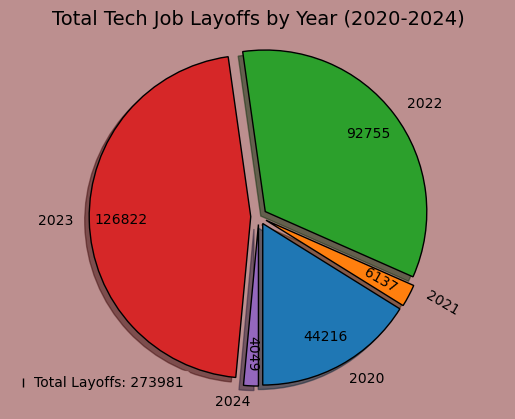

In [246]:
# Plot Lay Offs
#Groupby year and sum up layoffs for each year
layoffs_by_year = df_usa.groupby('Year')['Laid_Off'].sum()

plt.figure(facecolor='rosybrown')

# Plot
plt.pie(layoffs_by_year,
        labels=layoffs_by_year.index,
        autopct=lambda x: f'{int(x * sum(layoffs_by_year) / 100)}',
        startangle=270,
        shadow=True,
        pctdistance=0.8,
        explode=[0.05]*len(layoffs_by_year),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased':True},
        textprops={'rotation': 0}
        )
#rotate values that need to be rotated
for label in plt.gca().texts:
    text=label.get_text()
    if text in ['2021', '6137']:
      label.set_rotation(-30)  
    elif text in ['4049']:
      label.set_rotation(-90)     

# fill in literature
plt.title('Total Tech Job Layoffs by Year (2020-2024)', fontsize=14)
plt.axis('equal')

total_layoffs = sum(layoffs_by_year)
plt.legend([f'Total Layoffs: {total_layoffs}'],
           loc='lower left',
           handlelength=0,
           facecolor='rosybrown',
           edgecolor='rosybrown'
           )

plt.show()

so here I made a pie chart. I will change this to be the top 5 companies % of the overall layoffs versus the rest of the countries tech companies.

In [222]:
#plt.savefig('pie_layoffs.png')

<Figure size 640x480 with 0 Axes>

In [223]:
# compare companies with most layoff
# take top 5 companies

# rename SaleSan Franciscoorce
df_usa.loc[df_usa['Company'] == 'SaleSan Franciscoorce', 'Company'] = 'Salesforce'

# groupby Company Layoffs
company_layoffs = df_usa.groupby('Company')['Laid_Off'].sum()
usa_top_5 = company_layoffs.sort_values(ascending=False).head(5)
usa_top_5

Company
Amazon        27150
Meta          21000
Google        13000
Microsoft     10000
Salesforce    10000
Name: Laid_Off, dtype: int64

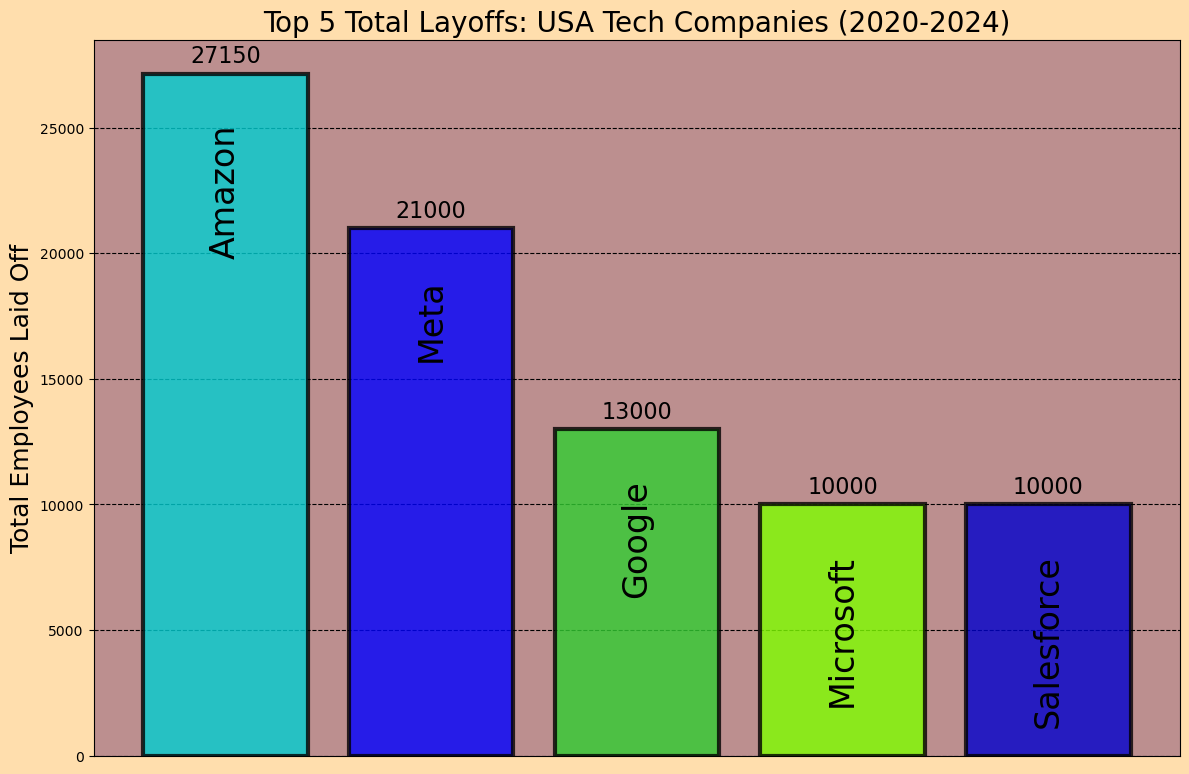

In [224]:
# Plot Bar Chart
fig, ax = plt.subplots(figsize=(12, 8), facecolor = 'navajowhite')

colors = ['darkturquoise', 'blue', 'limegreen', 'chartreuse', 'mediumblue']
bars = plt.bar(usa_top_5.index, usa_top_5, color=colors, alpha=0.8)

#gRaPH-x
for bar in bars:
    bar.set_linewidth(3)
    bar.set_edgecolor('black')
    bar.set_zorder(2)

#Literature
plt.title('Top 5 Total Layoffs: USA Tech Companies (2020-2024)', fontsize=20)
plt.ylabel('Total Employees Laid Off', fontsize=18)
plt.tight_layout()

#Labels
for i, v in enumerate(usa_top_5):
    plt.text(i, v + 250, str(v), ha='center', va='bottom', fontsize=16)

for i, company in enumerate(usa_top_5.index):
    plt.text(i, usa_top_5[i] - 2000, company, ha='center', va='top',
             rotation=90, fontsize=24, color='black')

#grid
plt.grid(axis='y', linestyle='--', alpha=1.0, color='black')

#set axis color
ax.set_facecolor('rosybrown')    

#clear out x ticks
plt.xticks([])
plt.show()

simple bar chart showing the top 5 tech companies that laid people off.

In [225]:
#plt.savefig('top_5.png')

<Figure size 640x480 with 0 Axes>

In [226]:
# view stock data before and after layoffs